In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import feature_utils as futils


In [2]:
# read the data
df = pd.read_excel('../datafeatures_14new.xlsx')
data = df.to_numpy()[:, 1:]
# id, word, num_total, num_hard, 1, 2, 3, 4, 5, 6, X
n = data.shape[0]
# data[:, 2]

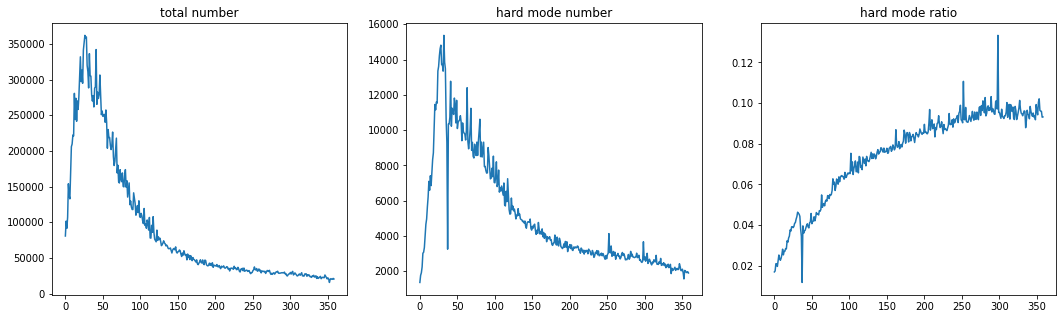

In [3]:
# simple visualization
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.plot(np.arange(n), data[:, 3])
plt.title('total number')

plt.subplot(1, 3, 2)
plt.plot(np.arange(n), data[:, 4])
plt.title('hard mode number')

plt.subplot(1, 3, 3)
HardModeRatio = (data[:, 4]/data[:, 3]).astype(np.float64)
plt.plot(np.arange(n), HardModeRatio)
plt.title('hard mode ratio')

diff_HMRatio = np.diff(HardModeRatio)

In [4]:
def moving_average(a, n=3) :
    ret = np.cumsum(a)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [5]:
df

,Unnamed: 0,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,...,begin,end,duplicate,freq,freq_weig,duplicate_con,vowel_num,vowel_begin,num_phonemes,appear freq
0,0,2022-01-07,202,slump,80630,1362,1,3,23,39,...,1.964358,-1.271214,0,0.461317,0.511157,0,1,0,5,-0.601197
1,1,2022-01-08,203,crank,101503,1763,1,5,23,31,...,0.659900,-0.923738,0,0.520873,0.557551,0,1,0,5,-0.161660
2,2,2022-01-09,204,gorge,91477,1913,1,3,13,27,...,-0.499618,1.552025,0,0.555048,0.580078,0,2,0,3,-0.216536
3,3,2022-01-10,205,query,107134,2242,1,4,16,30,...,-1.514197,0.509598,0,0.499582,0.502362,0,2,0,5,1.122311
4,4,2022-01-11,206,drink,153880,3017,1,9,35,34,...,-0.861968,-0.923738,0,0.479670,0.510066,0,1,0,5,1.089955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,354,2022-12-27,556,condo,20879,2012,0,2,17,35,...,0.659900,-1.140910,0,0.516578,0.553540,0,2,0,5,0.360134
355,355,2022-12-28,557,impel,20160,1937,0,3,21,40,...,-1.006908,-0.576262,0,0.536677,0.587237,0,2,1,5,-1.719913
356,356,2022-12-29,558,havoc,20001,1919,0,2,16,38,...,-0.934438,-1.401517,0,0.505127,0.542356,0,2,0,5,-0.285014
357,357,2022-12-30,559,molar,21204,1973,0,4,21,38,...,-0.282209,-0.098484,0,0.574771,0.600835,0,2,0,4,-0.746423


## interesting findings

In [6]:
# get average trial
AvgTrial = (np.sum(data[:, 6:12] * np.arange(1, 7), axis=1) / np.sum(data[:, 6:12], axis=1)).astype(np.float64)

# 尝试的期望 & 汇报玩的人数
print(
np.corrcoef(AvgTrial[1:], np.diff(np.array(data[:, 3]).astype(np.float64))))
# 尝试的期望 & hardmode汇报的人数
print(
np.corrcoef(AvgTrial[1:], np.diff(np.array(data[:, 4]).astype(np.float64))))

[[ 1.         -0.22259768]
 [-0.22259768  1.        ]]
[[ 1.         -0.01530351]
 [-0.01530351  1.        ]]


## Double counts

In [7]:
double_counts = futils.get_double_count(df["Word"])
double_score = []

for i in range(len(data)):
    double_score.append( futils.get_double_score(data[i, 2], double_counts, threshold=5) )

double_score = np.array(double_score)

## Trible counts

In [8]:
trible_counts = futils.get_trible_count(df["Word"])
trible_score = []

for i in range(len(data)):
    trible_score.append( futils.get_trible_score(data[i, 2], trible_counts, threshold=2) )

trible_score = np.array(trible_score)

## Spaced double counts

In [9]:
spaced_double_counts = futils.get_spaced_double_count(df["Word"])
spaced_double_score = []

for i in range(len(data)):
    spaced_double_score.append( futils.get_spaced_double_score(data[i, 2], spaced_double_counts, threshold=2) )

spaced_double_score = np.array(spaced_double_score)

## Begin counts

In [10]:
begin_counts = futils.get_begin_count(df["Word"])
begin_score = []

for i in range(len(data)):
    begin_score.append( futils.get_begin_score(data[i, 2], begin_counts, threshold=5) )

begin_score = np.array(begin_score)

In [ ]:
np.corrcoef(begin_score[1:], diff_HMRatio)

array([[ 1.        , -0.04583503],
       [-0.04583503,  1.        ]])

## End counts

In [11]:
end_counts = futils.get_end_count(df["Word"])
end_score = []

for i in range(len(data)):
    end_score.append( futils.get_end_score(data[i, 2], end_counts, threshold=5) )

end_score = np.array(end_score)

In [ ]:
np.corrcoef(end_score, AvgTrial)

array([[ 1.        , -0.00602857],
       [-0.00602857,  1.        ]])

In [ ]:
np.corrcoef(end_score[1:], diff_HMRatio)

array([[ 1.        , -0.02714911],
       [-0.02714911,  1.        ]])

## Duplicate of letters

In [12]:
duplicate_score = []
for i in range(len(data)):
    duplicate_score.append( futils.get_duplicate_score(data[i, 2]) )

duplicate_score = np.array(duplicate_score)

In [13]:
np.corrcoef(diff_HMRatio, duplicate_score[1:])

array([[1.        , 0.18575996],
       [0.18575996, 1.        ]])

In [14]:
window_size = 5  # best 

MA_HardModeRatio = moving_average(HardModeRatio, n=window_size)
print(HardModeRatio.shape, MA_HardModeRatio.shape)
np.corrcoef(HardModeRatio[(window_size//2):-(window_size//2)]-MA_HardModeRatio, 
    duplicate_score[(window_size//2):-(window_size//2)])

(359,) (355,)


array([[1.        , 0.23145971],
       [0.23145971, 1.        ]])

## Freq of letters (unweighted)

In [15]:
# get overall freq

freq_count = futils.stats_letter_freq(data[:, 2])
freq_count /= np.sum(freq_count)

In [16]:
# get freq score

freq_score = []
for i in range(len(data)):
    freq_score.append( futils.get_freq_score(data[i, 2], freq_count) )
freq_score = np.array(freq_score)

In [17]:
np.corrcoef(diff_HMRatio, freq_score[1:])

array([[ 1.        , -0.12324879],
       [-0.12324879,  1.        ]])

In [18]:
window_size = 9

MA_HardModeRatio = moving_average(HardModeRatio, n=window_size)
print(HardModeRatio.shape, MA_HardModeRatio.shape)
np.corrcoef(HardModeRatio[(window_size//2):-(window_size//2)]-MA_HardModeRatio, 
    freq_score[(window_size//2):-(window_size//2)])

(359,) (351,)


array([[ 1.        , -0.11511014],
       [-0.11511014,  1.        ]])

## Freq of letters (weighted)

In [19]:
freq_score_weighted = []
for i in range(len(data)):
    freq_score_weighted.append( futils.get_freq_score_weighted(data[i, 2], freq_count) )
freq_score_weighted = np.array(freq_score_weighted)

In [20]:
np.corrcoef(diff_HMRatio, freq_score_weighted[1:])


array([[ 1.        , -0.12213957],
       [-0.12213957,  1.        ]])

In [21]:
window_size = 3

MA_HardModeRatio = moving_average(HardModeRatio, n=window_size)
print(HardModeRatio.shape, MA_HardModeRatio.shape)
np.corrcoef(HardModeRatio[(window_size//2):-(window_size//2)]-MA_HardModeRatio, 
    freq_score_weighted[(window_size//2):-(window_size//2)])

(359,) (357,)


array([[ 1.        , -0.12188053],
       [-0.12188053,  1.        ]])

## Continuous duplicate

In [22]:

duplicate_conti_score = np.zeros(len(data))
for i in range(len(data)):
    duplicate_conti_score[i] = futils.get_duplicate_conti_score(data[i, 2])

In [23]:
np.corrcoef(diff_HMRatio, duplicate_conti_score[1:])

array([[1.        , 0.01383599],
       [0.01383599, 1.        ]])

In [24]:
window_size = 5

MA_HardModeRatio = moving_average(HardModeRatio, n=window_size)
np.corrcoef(HardModeRatio[(window_size//2):-(window_size//2)]-MA_HardModeRatio, 
    duplicate_conti_score[(window_size//2):-(window_size//2)])

array([[1.        , 0.01959615],
       [0.01959615, 1.        ]])

## vowel number

In [25]:
vowel_num_score = np.zeros(len(data))

for i in range(len(data)):
    vowel_num_score[i] = futils.get_vowel_number_score(data[i, 2])

In [26]:
np.corrcoef(diff_HMRatio, vowel_num_score[1:])

array([[ 1.        , -0.03077889],
       [-0.03077889,  1.        ]])

In [27]:
window_size = 5

MA_HardModeRatio = moving_average(HardModeRatio, n=window_size)
np.corrcoef(HardModeRatio[(window_size//2):-(window_size//2)]-MA_HardModeRatio, 
    vowel_num_score[(window_size//2):-(window_size//2)])

array([[1.        , 0.07561359],
       [0.07561359, 1.        ]])

## beginswith vowel

In [28]:
vowel_begin_score = np.zeros(len(data))

for i in range(len(data)):
    vowel_begin_score[i] = futils.get_begin_vowel_score(data[i, 2])

In [29]:
np.corrcoef(diff_HMRatio, vowel_begin_score[1:])

array([[ 1.        , -0.05156694],
       [-0.05156694,  1.        ]])

In [30]:
window_size = 5

MA_HardModeRatio = moving_average(HardModeRatio, n=window_size)
np.corrcoef(HardModeRatio[(window_size//2):-(window_size//2)]-MA_HardModeRatio, 
    vowel_begin_score[(window_size//2):-(window_size//2)])

array([[1.        , 0.03504819],
       [0.03504819, 1.        ]])

## Num of phonemes

In [31]:

with open('../phoneme_processed.txt', 'r') as f:
    num_phonemes = np.array( [float(x) for x in f.read().split()] )

In [32]:
np.corrcoef(diff_HMRatio, num_phonemes[1:])

array([[1.        , 0.04401495],
       [0.04401495, 1.        ]])

In [33]:
window_size = 5

MA_HardModeRatio = moving_average(HardModeRatio, n=window_size)
np.corrcoef(HardModeRatio[(window_size//2):-(window_size//2)]-MA_HardModeRatio, 
    num_phonemes[(window_size//2):-(window_size//2)])

array([[1.        , 0.02109674],
       [0.02109674, 1.        ]])

## commonality 

In [34]:
commonality = data[:, -1].astype(np.float64)
np.corrcoef(diff_HMRatio, commonality[1:])

array([[ 1.        , -0.17908686],
       [-0.17908686,  1.        ]])

In [35]:
window_size = 7

MA_HardModeRatio = moving_average(HardModeRatio, n=window_size)
np.corrcoef(HardModeRatio[(window_size//2):-(window_size//2)]-MA_HardModeRatio, 
    commonality[(window_size//2):-(window_size//2)])

array([[ 1.        , -0.22117517],
       [-0.22117517,  1.        ]])

## Expectation of trials

In [36]:
diff_AvgTrial = np.diff(AvgTrial)

print(np.corrcoef(diff_HMRatio, AvgTrial[1:]))
print(np.corrcoef(diff_HMRatio, AvgTrial[:-1]))

[[1.         0.39283911]
 [0.39283911 1.        ]]
[[ 1.         -0.39485717]
 [-0.39485717  1.        ]]


In [37]:
window_size = 7

MA_HardModeRatio = moving_average(HardModeRatio, n=window_size)
print(HardModeRatio.shape, MA_HardModeRatio.shape)
np.corrcoef(HardModeRatio[(window_size//2):-(window_size//2)]-MA_HardModeRatio, AvgTrial[(window_size//2):-(window_size//2)])

(359,) (353,)


array([[1.        , 0.51417608],
       [0.51417608, 1.        ]])

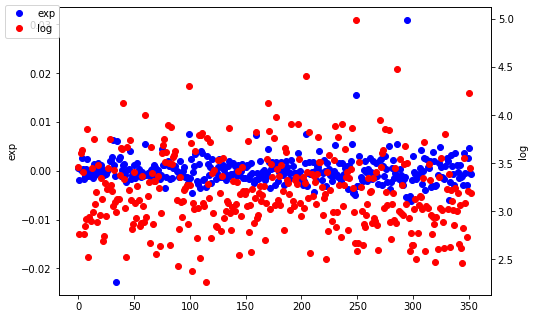

In [38]:
fig = plt.figure()
a1 = fig.add_axes([0,0,1,1])
x = np.arange(n-(window_size-1))
a1.plot(x,HardModeRatio[(window_size//2):-(window_size//2)]-MA_HardModeRatio, 'bo')
a1.set_ylabel('exp')
a2 = a1.twinx()
a2.plot(x, AvgTrial[(window_size//2):-(window_size//2)],'ro')
a2.set_ylabel('log')
fig.legend(labels = ('exp','log'),loc='upper left')
plt.show()

## output the features

In [39]:
print(duplicate_score.shape)
print(freq_score.shape)
print(freq_score_weighted.shape)
print(duplicate_conti_score.shape)
print(vowel_num_score.shape)
print(vowel_begin_score.shape)
print(num_phonemes.shape)

(359,)
(359,)
(359,)
(359,)
(359,)
(359,)
(359,)


In [40]:
df = pd.DataFrame({
    'double': double_score,
    'trible': trible_score,
    'spaced_double': spaced_double_score,
    'begin': begin_score,
    'end': end_score,
    'duplicate': duplicate_conti_score, 
    'freq': freq_score, 
    'freq_weig': freq_score_weighted, 
    'duplicate_con': duplicate_conti_score, 
    'vowel_num': vowel_num_score, 
    'vowel_begin': vowel_begin_score, 
    'num_phonemes': num_phonemes
})
df.head()

,double,trible,spaced_double,begin,end,duplicate,freq,freq_weig,duplicate_con,vowel_num,vowel_begin,num_phonemes
0,17,2,7,51,8,0.0,0.461920,0.512246,0.0,1.0,0.0,5.0
1,41,3,21,33,16,0.0,0.520873,0.557551,0.0,1.0,0.0,5.0
2,31,6,14,17,73,0.0,0.555048,0.580078,0.0,2.0,0.0,3.0
3,41,2,7,0,49,0.0,0.499582,0.502362,0.0,2.0,0.0,5.0
4,46,7,17,12,16,0.0,0.479670,0.510066,0.0,1.0,0.0,5.0


In [41]:
# df.to_excel('datafeatures_wl.xlsx')